In [3]:
#!pip install pqdict

the mst is
[(0, 7), (1, 7), (0, 2), (2, 3), (5, 7), (4, 5), (6, 2)]
each node with the smallest edge connected to it
{0: 0, 1: 0.19, 2: 0.26, 3: 0.17, 4: 0.35, 5: 0.28, 6: 0.4, 7: 0.16}


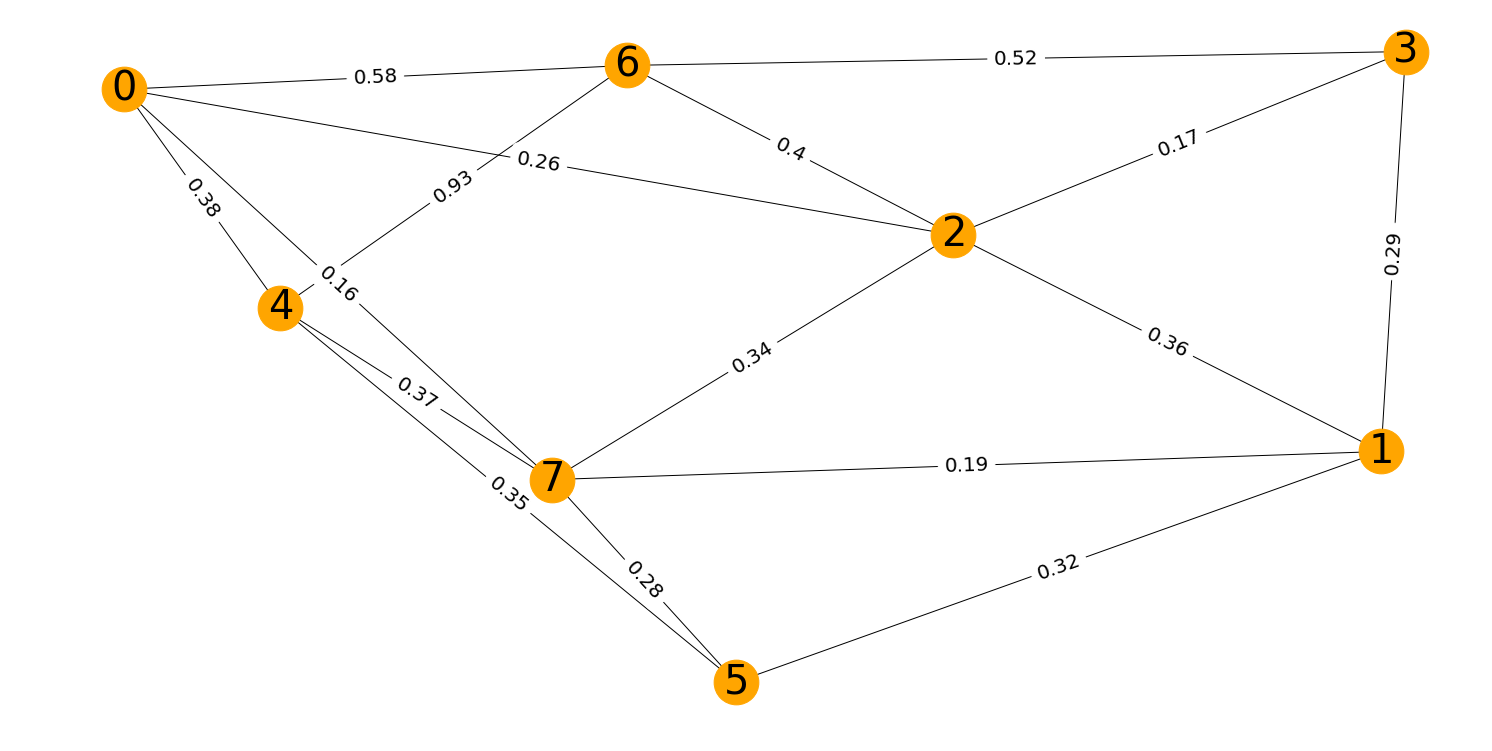

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 13 22:33:44 2019

@author: moqa
"""

import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt

from pqdict import pqdict # for an indexed priority queue (with key value pair) that allows updating values

class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def __str__(self):
        return "{} -({})-> {}".format(self.s,self.weight,self.t)

class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.t, e.weight) for e in self.neighbors]
      
        
class weightedGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        self.size = len(self.node_names) # how many nodes do we have
        self.create_graph()
      
    def add_edge(self, e:edge):
        """undirected Edge"""
        self.nodes[e.s].neighbors.append(e)
        self.nodes[e.t].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'orange'):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_weighted_edges_from(self.elist)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=2000, node_color=color, font_size=40, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=20,  edge_labels = nx.get_edge_attributes(G,'weight'))



class primMST():
    '''
    Finding the mst of a graph using Prim's algorithm with eager implementation
    '''
    def __init__(self, G:weightedGraph, s):
        
        self.G = G
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        
        self.pq = pqdict() # Indexed Priority Queue (Key: node name , Value: smallest distance)
        self.in_pq = {n :False for n in G.node_names} # initially no elements in the queue
        self.mst = [] # list for mst
        self.marked = {n: False for n in G.node_names} # 
        self.visit(s)
        
        while self.pq and len(self.mst) < G.size - 1:
            # print([item for item in self.pq.items()]) # for debugging 
            v, distance = self.pq.popitem() # pop a vertex
            self.mst.append(self.edgeTo[v]) # adding the edge of the minimum distance in pq
            self.visit(v) # visiting the added vertix to mst
                
    def visit(self, v):
        self.marked[v] = True # it is been added to mst
        for e in self.G.nodes[v].neighbors:
            s, t = e.s, e.t
            ''' 
            if the vertix is the target of the edge then set the source(s) to be the vertix
            and the target(t) to be the source of the edge
            else, that is the vertix is the source of the edge so no changes
            '''
            if(v == e.t):
                s = v
                t = e.s
            
            if(not self.marked[t]):
                # print((s, t, e.weight)) # for debugging
                if e.weight < self.distTo[t]:
                    self.distTo[t] = e.weight
                    self.edgeTo[t] = e
                    # if not already in pq add it Otherwise update the item
                    if(not self.in_pq[t]): 
                        self.pq.additem(t, self.distTo[t]) 
                        self.in_pq[t] = True 
                    else:
                        self.pq.updateitem(t, self.distTo[t])



if __name__ == "__main__":
    elist =[(0, 7, 0.16),
            (2, 3, 0.17),
            (1, 7, 0.19),
            (0, 2, 0.26),
            (5, 7, 0.28),
            (1, 3, 0.29),
            (1, 5, 0.32),
            (2, 7, 0.34),
            (4, 5, 0.35),
            (1, 2, 0.36),
            (4, 7, 0.37),
            (0, 4, 0.38),
            (6, 2, 0.40),
            (3, 6, 0.52),
            (6, 0, 0.58),
            (6, 4, 0.93)]
    
    G = weightedGraph(elist)
    G.draw()
    T = primMST(G,0)
    print('the mst is',[(e.s, e.t) for e in T.mst], sep = '\n')
    print('each node with the smallest edge connected to it',T.distTo, sep = '\n')